In [1]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori


In [2]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score

In [3]:
df = pd.read_csv("wineQT.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [4]:
df1=df.drop(['Id'], axis=1)

In [5]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [6]:
#df.quality=df.quality.replace({3:0,4:0,5:0,6:1,7:1,8:1})#here we can use apply function
#df.quality.unique()
df1['quality']= df1['quality'].apply(lambda y_value: 1 if y_value >5 else 0)

In [7]:
df1.quality.unique()

array([0, 1], dtype=int64)

In [8]:
df1['quality'].value_counts()

1    621
0    522
Name: quality, dtype: int64

In [9]:
df1.shape

(1143, 12)

C:\Users\ssing\anaconda4\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\ssing\anaconda4\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<AxesSubplot:title={'center':'Quality vs free SO2'}, xlabel='quality', ylabel='free sulfur dioxide'>

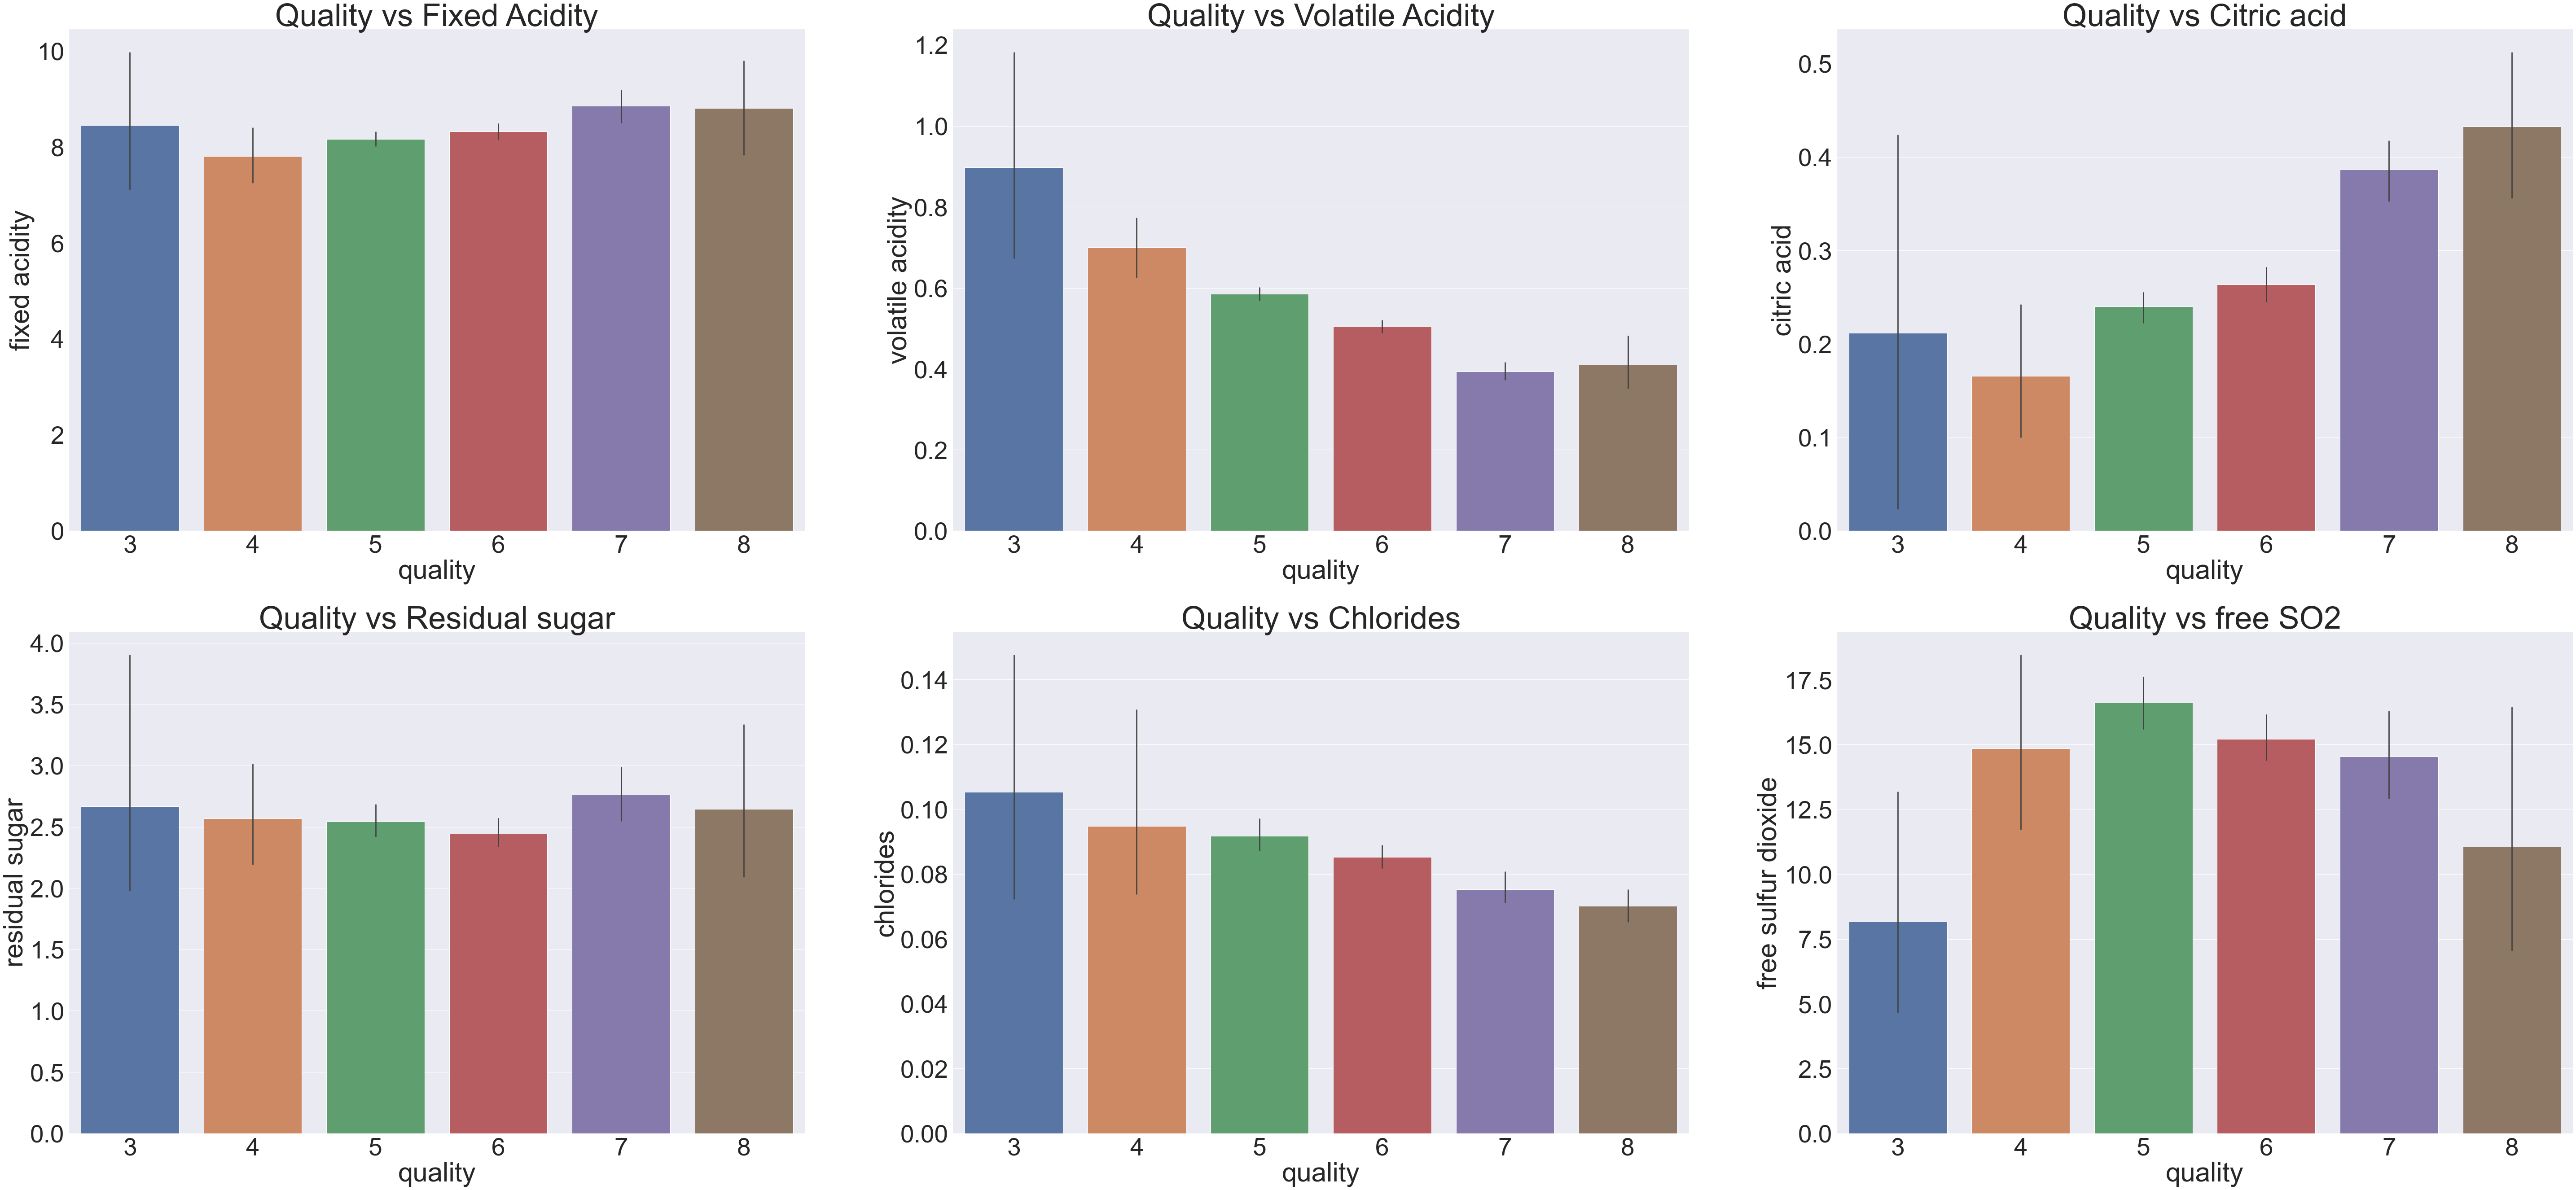

In [10]:
plt.figure(figsize=(100,70))
sns.set(font_scale=5)
plt.subplot(331)
plt.title("Quality vs Fixed Acidity",fontsize=70)
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

plt.subplot(332)
plt.title("Quality vs Volatile Acidity",fontsize=70)
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

plt.subplot(333)
plt.title("Quality vs Citric acid",fontsize=70)
sns.barplot(x = 'quality', y = 'citric acid', data = df)

plt.subplot(334)
plt.title("Quality vs Residual sugar",fontsize=70)
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

plt.subplot(335)
plt.title("Quality vs Chlorides",fontsize=70)
sns.barplot(x = 'quality', y = 'chlorides', data = df)

plt.subplot(336)
plt.title("Quality vs free SO2",fontsize=70)
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

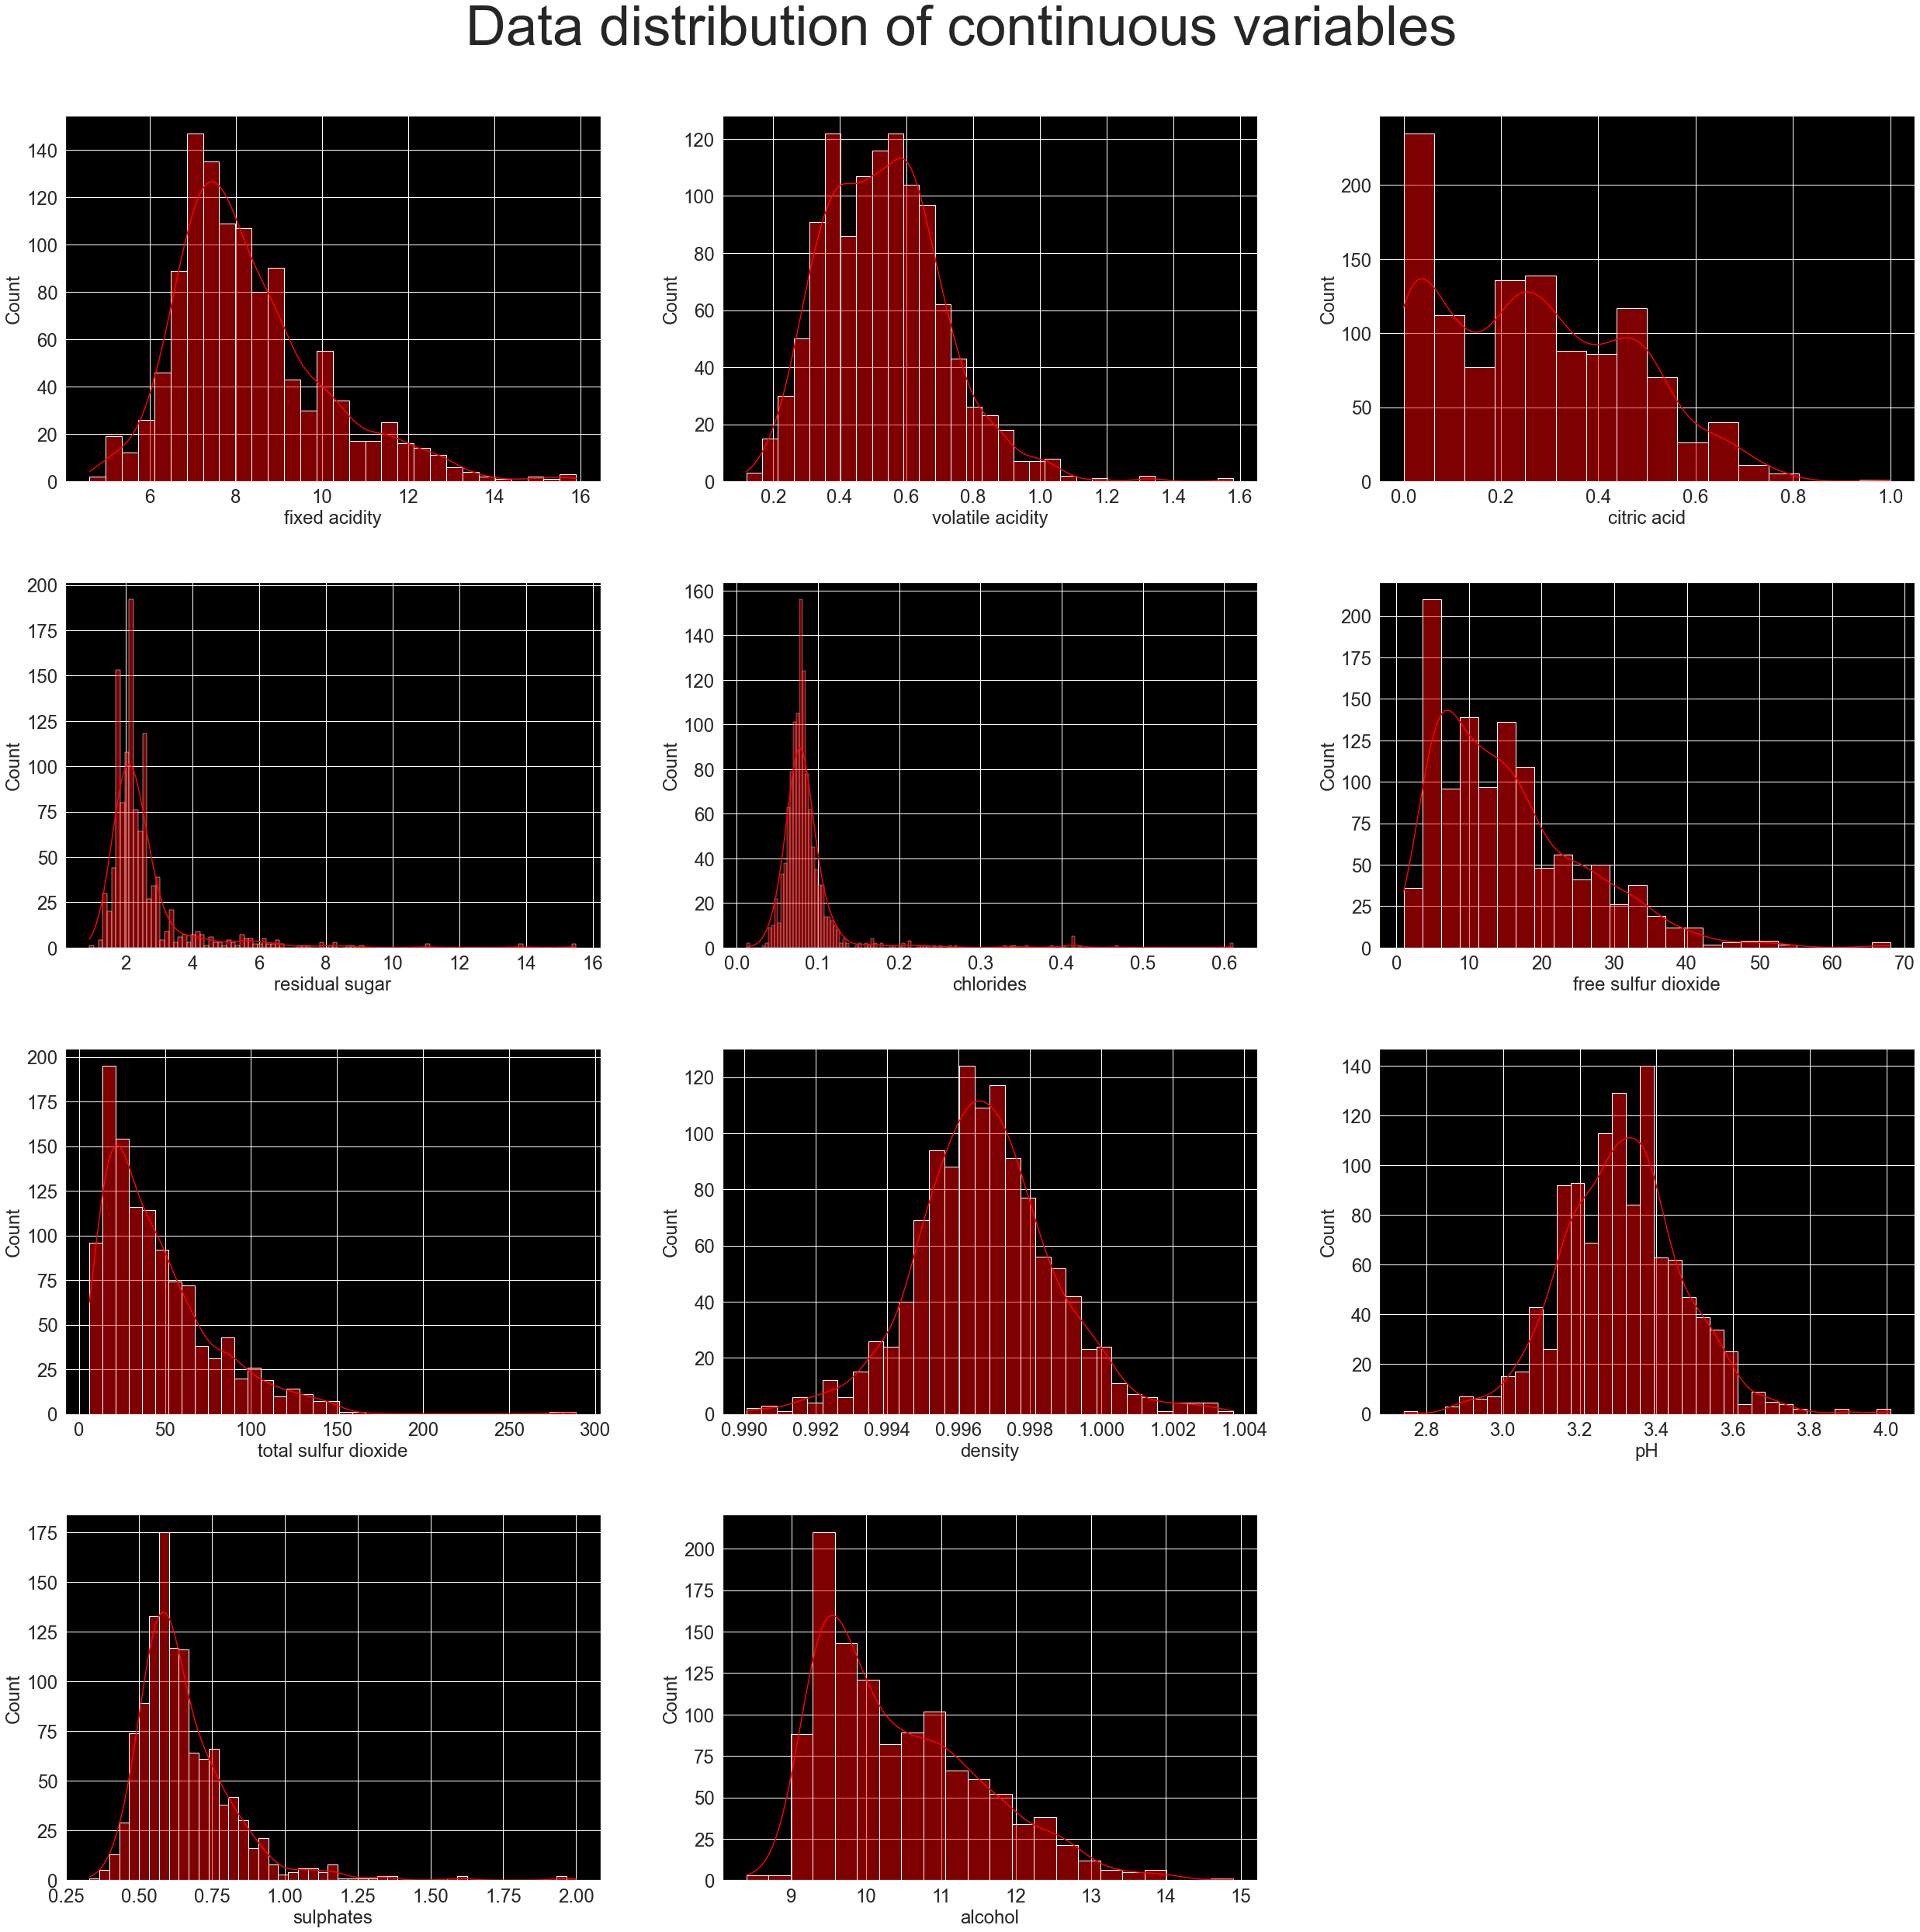

In [11]:
plt.figure(figsize=(36, 36))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(4,3, i+1)
    sns.histplot(data=df1, x=col, ax=ax,color='red',kde=True)
    ax.set_xlabel(col, fontsize=24)
    ax.set_ylabel('Count', fontsize=24)
    ax.tick_params(axis='x', labelsize=24)
    ax.tick_params(axis='y', labelsize=24)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

In [12]:
#we can clearly see outliners

In [13]:
#This function will replace the outliers with the median from the dataset
def outlier_treating(data,var):
    df=data.copy()#creating a copy of the data
    def outlier_detector(data):#detecting the outliers
        outliers=[]
        q1=np.percentile(data,25)
        q3=np.percentile(data,75)
        IQR=q3-q1
        lb=q1-(IQR*1.5)
        ub=q3+(IQR*1.5)
        for i,j in enumerate(data):
            if(j<lb or j>ub):
                outliers.append(i)
        return outliers
    for i in var:
        out_var=outlier_detector(df[i])#calling outlier_detector function 
        df.loc[out_var,i]=np.median(df[i])#replacing the outliers to the median
    return df

In [14]:
#selecting variables that have outliers
var=list(df.select_dtypes(include=['float64']).columns)

In [15]:
df=outlier_treating(df1,var)

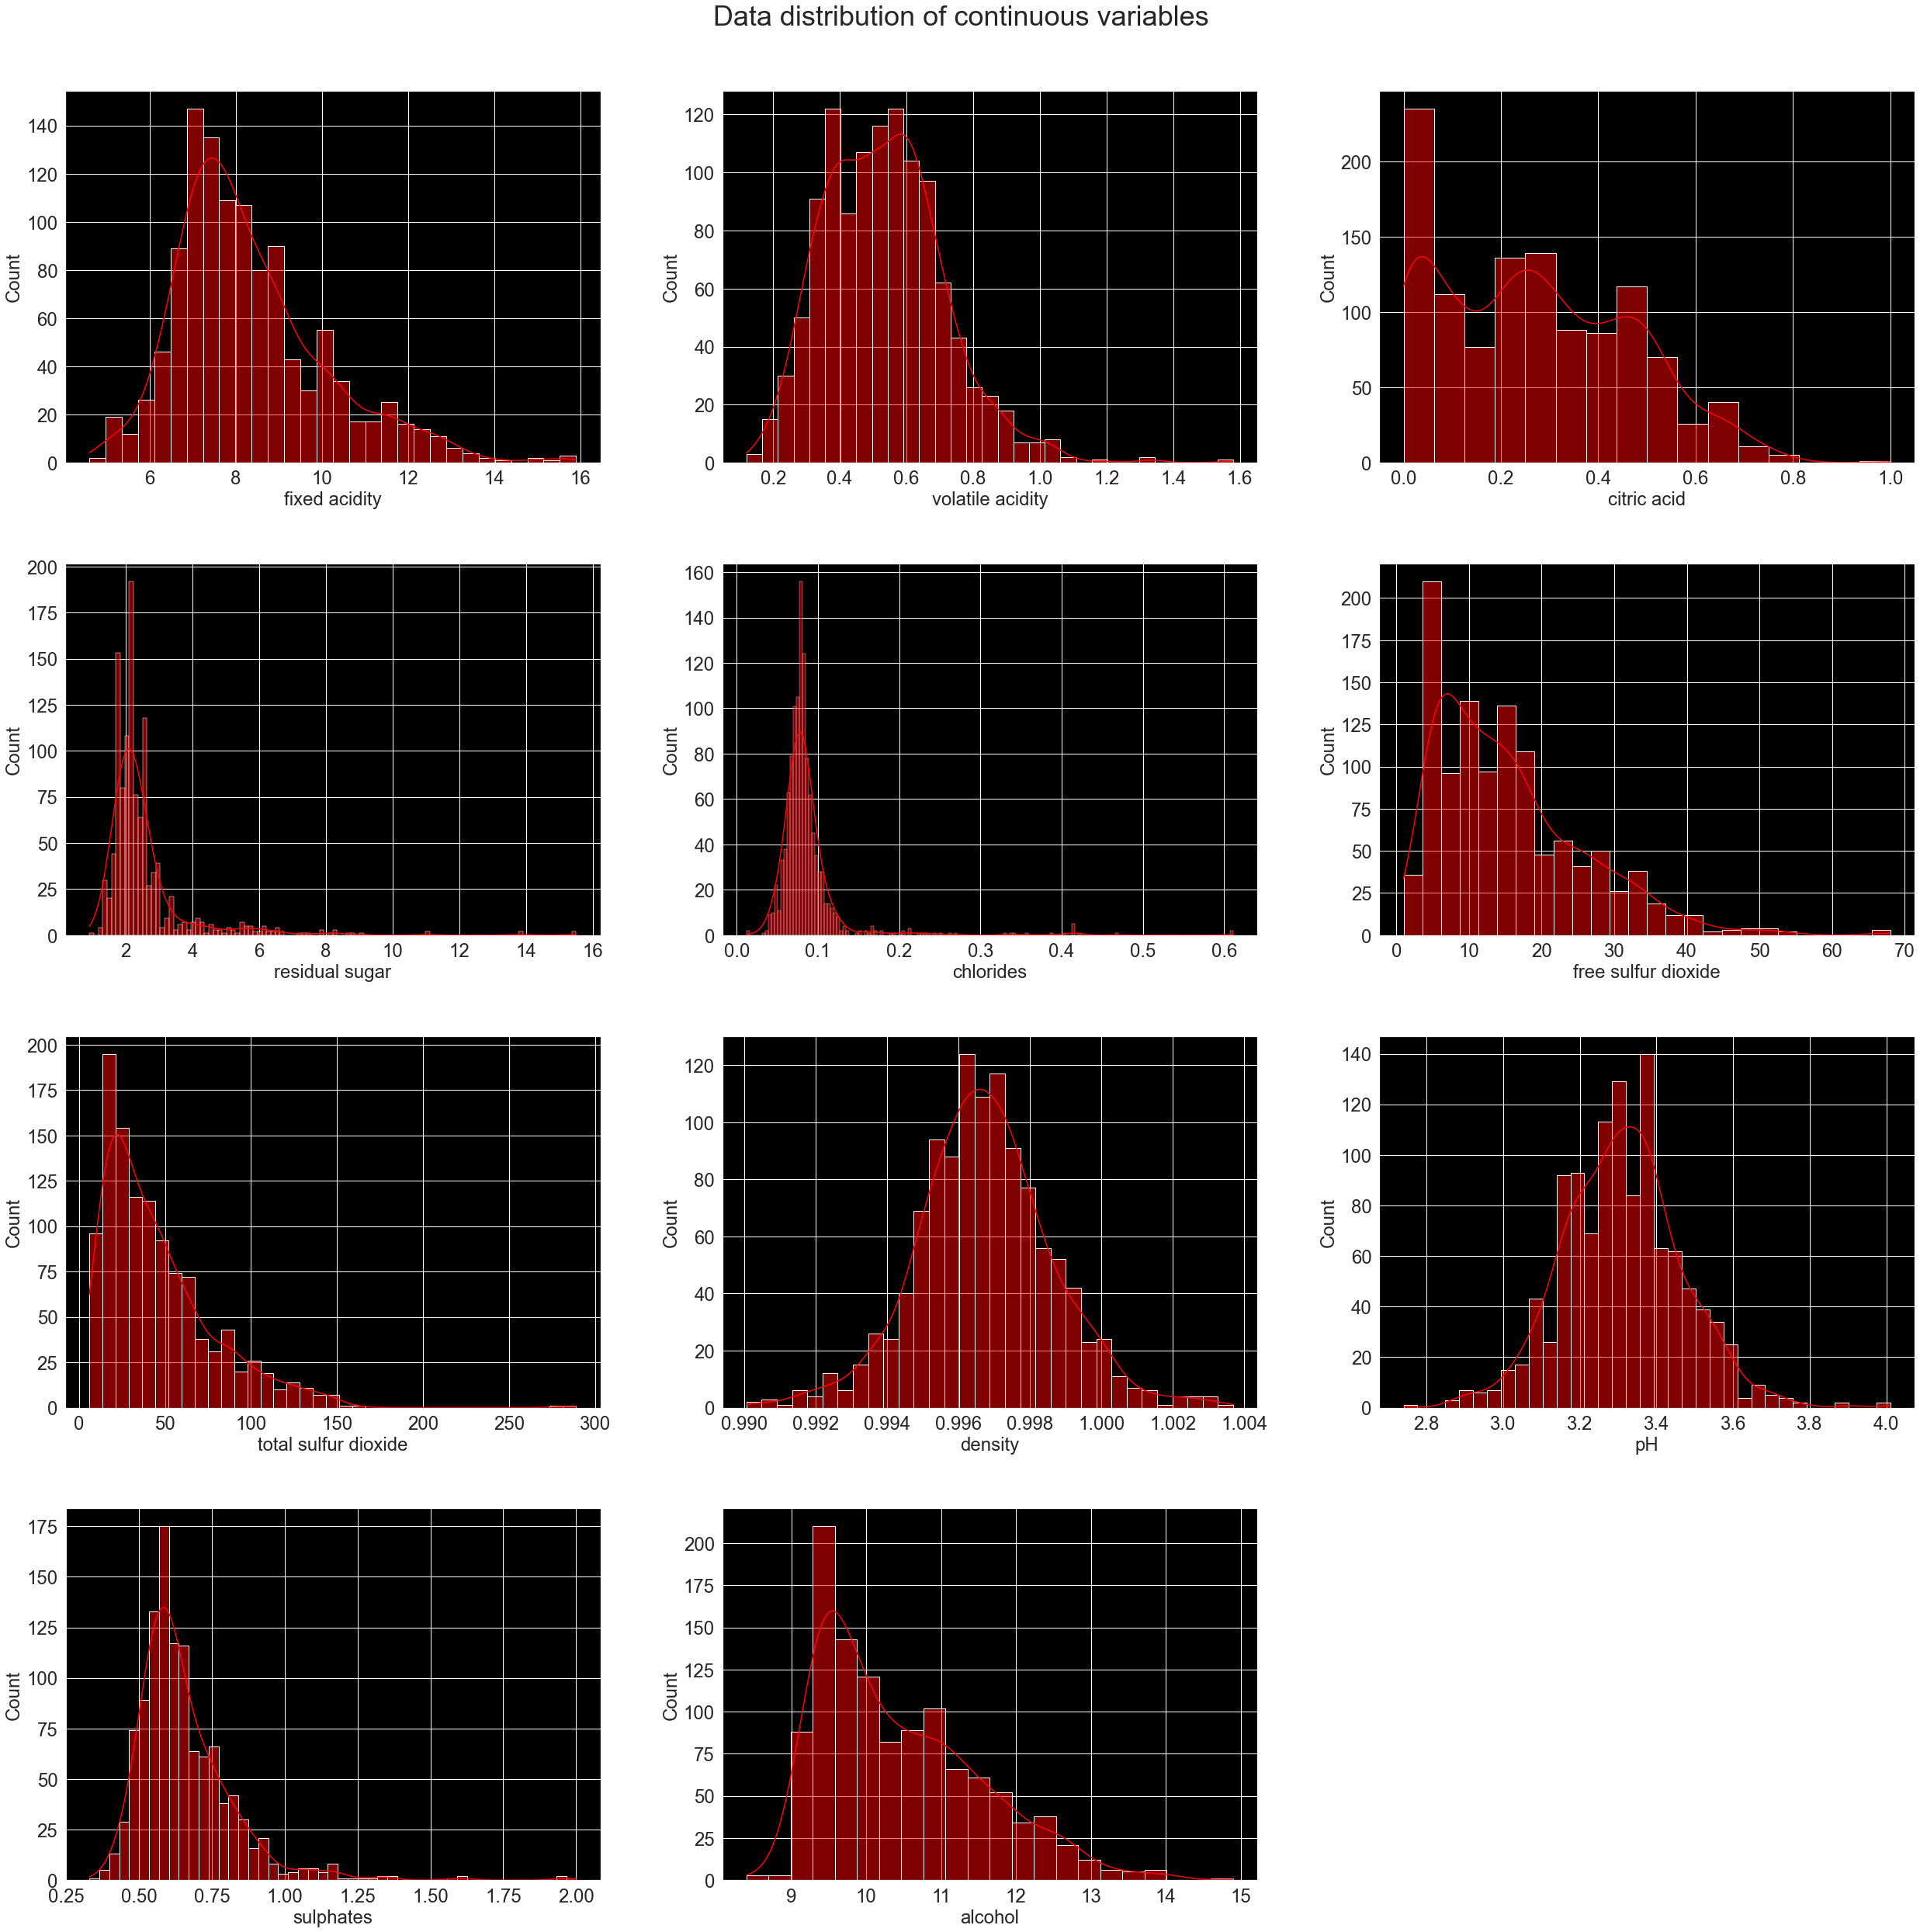

In [16]:
plt.figure(figsize=(36, 36))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(4, 3, i+1)
    sns.histplot(data=df1, x=col, ax=ax, color='red', kde=True)
    ax.set_xlabel(col, fontsize=24)
    ax.set_ylabel('Count', fontsize=24)
    ax.tick_params(axis='x', labelsize=24)
    ax.tick_params(axis='y', labelsize=24)
plt.suptitle('Data distribution of continuous variables', fontsize=36)
plt.tight_layout()



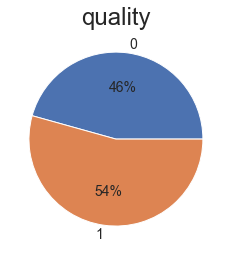

In [17]:
target_var = pd.crosstab(index=df1['quality'], columns='% observations')
plt.pie(target_var['% observations'], labels=target_var['% observations'].index, autopct='%.0f%%',textprops={'fontsize': 14})
plt.title('quality',fontsize = 24)
plt.show()


In [18]:
X = df1.drop(['quality'] ,axis=1)


In [19]:
y = df1['quality']


In [20]:
# lets see which features are important or plays vital role

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif#ANOVA

In [22]:
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X, y)

SelectKBest(k='all')

In [23]:
feature_contribution=(fs.scores_/sum(fs.scores_))*100

In [24]:
print(X.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


fixed acidity : 1.45%
volatile acidity : 22.41%
citric acid : 4.50%
residual sugar : 0.01%
chlorides : 1.87%
free sulfur dioxide : 0.91%
total sulfur dioxide : 9.88%
density : 4.45%
pH : 0.04%
sulphates : 10.59%
alcohol : 43.89%


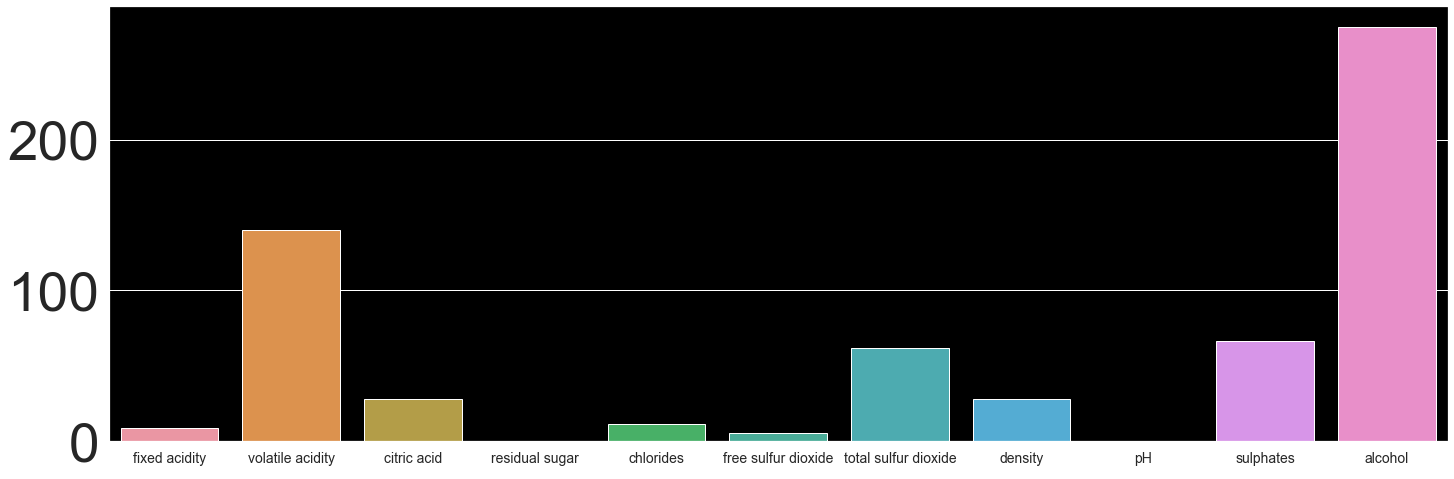

In [25]:
for i,j in enumerate(X.columns):
    print(f'{j} : {feature_contribution[i]:.2f}%')
plt.figure(figsize=(24,8))
sns.barplot(x=X.columns,y=fs.scores_)
plt.xticks(fontsize=14)
plt.show()

In [26]:
#so, we can remove pH,residual sugar,fixed acidity,free sulfur dioxide columns

In [27]:
X=X.drop(['pH','residual sugar','fixed acidity','free sulfur dioxide'], axis=1)

In [28]:
X

,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol
0,0.700,0.00,0.076,34.0,0.99780,0.56,9.4
1,0.880,0.00,0.098,67.0,0.99680,0.68,9.8
2,0.760,0.04,0.092,54.0,0.99700,0.65,9.8
3,0.280,0.56,0.075,60.0,0.99800,0.58,9.8
4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4
...,...,...,...,...,...,...,...
1138,0.510,0.13,0.076,40.0,0.99574,0.75,11.0
1139,0.620,0.08,0.068,38.0,0.99651,0.82,9.5
1140,0.600,0.08,0.090,44.0,0.99490,0.58,10.5
1141,0.550,0.10,0.062,51.0,0.99512,0.76,11.2


In [69]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [70]:

model=RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)
model.fit(x_train, y_train)
from sklearn.metrics import accuracy_score
X_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(X_test_prediction,y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.7696793002915452


In [84]:
log_clf = LogisticRegression(max_iter=10000)
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)
knn_clf = KNeighborsClassifier()


In [85]:
for clf, label in zip([log_clf,dt_clf,rf_clf,knn_clf], ['Logistic Regression', 'Decision Tree','Random Forest','KNeighborsClassifier']):

    scores =  model_selection.cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.5f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.74717 (+/- 0.02) [Logistic Regression]
Accuracy: 0.66497 (+/- 0.05) [Decision Tree]
Accuracy: 0.74369 (+/- 0.02) [Random Forest]
Accuracy: 0.62819 (+/- 0.05) [KNeighborsClassifier]


In [33]:
from mlxtend.classifier import EnsembleVoteClassifier

In [73]:
eclf = EnsembleVoteClassifier(clfs=[log_clf,GNB_clf,rf_clf,ada_clf],weights=[1,1,1,1], 
                              voting='hard')

labels = ['Logistic Regression', 'naive Bayes','Random Forest','AdaBoostClassifier','fused']
for clf, label in zip([log_clf,GNB_clf,rf_clf,ada_clf,eclf], labels):

    scores = model_selection.cross_val_score(clf,X, y, 
                                              cv=5, 
                                              scoring='accuracy')
    print("Accuracy: %0.5f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

Accuracy: 0.74717 (+/- 0.02) [Logistic Regression]
Accuracy: 0.73843 (+/- 0.03) [naive Bayes]
Accuracy: 0.74369 (+/- 0.02) [Random Forest]
Accuracy: 0.73930 (+/- 0.02) [AdaBoostClassifier]
Accuracy: 0.74543 (+/- 0.03) [fused]


In [35]:
from sklearn.model_selection import GridSearchCV
classifier=GridSearchCV(RandomForestClassifier(),{'n_estimators':[10,30,40,50,70,100,200,300],
                                                  'criterion':["gini", "entropy"],
                                                 'max_features':["auto", "sqrt", "log2"]},cv=15)
classifier.fit(X,y)

GridSearchCV(cv=15, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 30, 40, 50, 70, 100, 200, 300]})

In [36]:
pd.DataFrame(classifier.cv_results_)[['param_n_estimators','param_max_features','param_criterion','mean_test_score']]

,param_n_estimators,param_max_features,param_criterion,mean_test_score
0,10,auto,gini,0.702563
1,30,auto,gini,0.732354
2,40,auto,gini,0.730588
3,50,auto,gini,0.721827
4,70,auto,gini,0.722739
5,100,auto,gini,0.728845
6,200,auto,gini,0.744577
7,300,auto,gini,0.736694
8,10,sqrt,gini,0.711324
9,30,sqrt,gini,0.738483


In [37]:
classifier.best_params_

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 200}

In [38]:
classifier.best_score_

0.7445773524720892

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [82]:
#Accuarcy for logistic regression
classifier2=LogisticRegression(max_iter=10000)
classifier2.fit(X,y)
y_pred=classifier2.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,Y_test)*100:.2f}%")

Model Accuracy : 78.13%


In [76]:
#Accuracy for RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

classifier1 = RandomForestClassifier(n_estimators=500, criterion='entropy', random_state=0)
classifier1.fit(x_train, y_train)
y_pred = classifier1.predict(x_test)
print(f"Model Accuracy: {accuracy_score(y_pred, y_test) * 100:.2f}%")

Model Accuracy: 76.97%


In [78]:
#Accuracy for DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)
from sklearn.metrics import accuracy_score
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)
print("Accuracy:",test_data_accuracy)

Accuracy: 0.7405247813411079


In [79]:
#Accuracy for KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,Y_train)
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)
print("Accuracy:",test_data_accuracy)

Accuracy: 0.6355685131195336


In [86]:
for clf, label in zip([log_clf,dt_clf,rf_clf,knn_clf], ['Logistic Regression', 'Decision Tree','Random Forest','KNeighborsClassifier']):

    scores =  model_selection.cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.5f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.74717 (+/- 0.02) [Logistic Regression]
Accuracy: 0.66411 (+/- 0.04) [Decision Tree]
Accuracy: 0.74369 (+/- 0.02) [Random Forest]
Accuracy: 0.62819 (+/- 0.05) [KNeighborsClassifier]


In [53]:
y.mean()


0.5433070866141733

In [44]:
y.mean()

0.5433070866141733